In [14]:
!pip install autokeras==1.0.19 --no-deps
!pip install tables

In [15]:
import tensorflow as tf
import autokeras as ak

import pandas as pd 
import numpy as np 
import os 

from PIL import Image

from sklearn.model_selection import train_test_split

In [16]:
df = pd.read_hdf('training_data/image_arr_worship.h5')

In [17]:
df.head()

,img_arr,crs:Temperature,crs:Tint,crs:Exposure2012,crs:Contrast2012,crs:Highlights2012,crs:Shadows2012,crs:Whites2012,crs:Blacks2012,crs:Texture,...,crs:RedHue,crs:RedSaturation,crs:GreenHue,crs:GreenSaturation,crs:BlueHue,crs:BlueSaturation,crs:LuminanceNoiseReductionDetail,crs:LuminanceNoiseReductionContrast,crs:GrainSize,crs:GrainFrequency
MJB_1755,"[[[8, 6, 13], [8, 7, 14], [10, 8, 13], [12, 6,...",4805.0,27.0,0.00,3.0,-49.0,46.0,11.0,-24.0,10.0,...,14.0,45.0,95.0,-15.0,6.0,-25.0,50.0,0.0,26.0,50.0
MJB_1421,"[[[98, 98, 144], [95, 100, 144], [90, 102, 142...",3587.0,-5.0,0.95,10.0,-38.0,-10.0,-8.0,1.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,41.0,42.0
MJB_1810,"[[[6, 1, 7], [7, 2, 6], [7, 1, 7], [7, 1, 7], ...",4750.0,5.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
MJB_1806,"[[[17, 2, 8], [16, 2, 8], [14, 2, 7], [14, 3, ...",3016.0,-14.0,1.00,33.0,-84.0,-5.0,0.0,-14.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,41.0,42.0
MJB_1437,"[[[47, 10, 9], [51, 11, 11], [45, 12, 14], [50...",4311.0,-5.0,1.70,5.0,-39.0,-86.0,-39.0,-12.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,41.0,42.0


In [18]:
df['img_arr']

MJB_1755    [[[8, 6, 13], [8, 7, 14], [10, 8, 13], [12, 6,...
MJB_1421    [[[98, 98, 144], [95, 100, 144], [90, 102, 142...
MJB_1810    [[[6, 1, 7], [7, 2, 6], [7, 1, 7], [7, 1, 7], ...
MJB_1806    [[[17, 2, 8], [16, 2, 8], [14, 2, 7], [14, 3, ...
MJB_1437    [[[47, 10, 9], [51, 11, 11], [45, 12, 14], [50...
                                  ...                        
5D4_9083    [[[14, 4, 14], [15, 3, 16], [17, 3, 15], [12, ...
5D4_9081    [[[7, 2, 6], [8, 1, 6], [7, 1, 7], [6, 1, 7], ...
5D4_9079    [[[43, 8, 9], [46, 7, 4], [36, 7, 6], [42, 8, ...
5D4_9051    [[[6, 3, 3], [6, 2, 3], [5, 2, 4], [6, 3, 3], ...
5D4_9050    [[[28, 8, 5], [26, 9, 6], [24, 6, 7], [27, 9, ...
Name: img_arr, Length: 143, dtype: object

In [19]:
df['crs:Temperature']

MJB_1755    4805.0
MJB_1421    3587.0
MJB_1810    4750.0
MJB_1806    3016.0
MJB_1437    4311.0
             ...  
5D4_9083    3480.0
5D4_9081    3480.0
5D4_9079    3224.0
5D4_9051    4559.0
5D4_9050    4559.0
Name: crs:Temperature, Length: 143, dtype: float64

In [20]:
# df_train = df[['img_arr','crs:Temperature']]

X = df['img_arr'].values
y = df['crs:Exposure2012']

In [21]:
len(X)

143

In [22]:
X = np.stack(X)
# X = X.reshape(143, 500, 500, 3)

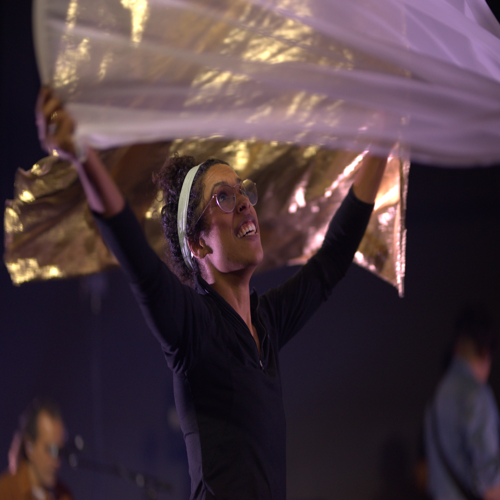

In [23]:
Image.fromarray(X[0])

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [25]:
print(x_train.shape)
print(y_train.shape)

(100, 500, 500, 3)
(100,)


The second step is to run the ImageRegressor.  It is recommended have more
trials for more complicated datasets.  This is just a quick demo of MNIST, so
we set max_trials to 1.  For the same reason, we set epochs to 2.  You can also
leave the epochs unspecified for an adaptive number of epochs.


In [13]:
# Initialize the image regressor.
reg = ak.ImageRegressor(overwrite=True)
# Feed the image regressor with training data.
reg.fit(x_train, y_train)


# Predict with the best model.
predicted_y = reg.predict(x_test)
print(predicted_y)


# Evaluate the best model with testing data.
print(reg.evaluate(x_test, y_test))

Trial 14 Complete [00h 16m 36s]
val_loss: 1.3624517917633057

Best val_loss So Far: 0.8832048177719116
Total elapsed time: 02h 41m 41s

Search: Running Trial #15

Value             |Best Value So Far |Hyperparameter
True              |True              |image_block_1/normalize
False             |False             |image_block_1/augment
resnet            |resnet            |image_block_1/block_type
False             |False             |image_block_1/res_net_block_1/pretrained
resnet50          |resnet50          |image_block_1/res_net_block_1/version
False             |False             |image_block_1/res_net_block_1/imagenet_size
0                 |0                 |regression_head_1/dropout
adam              |adam              |optimizer
1e-05             |0.001             |learning_rate



2023-03-13 10:37:45.016824: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch 1/1000


2023-03-13 10:37:47.669819: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/3 [=========>....................] - ETA: 26s - loss: 6.0942 - mean_squared_error: 6.0942

KeyboardInterrupt: 

In [ ]:
predicted_y

In [ ]:
y_test

## Reference
[ImageRegressor](/image_regressor),
[AutoModel](/auto_model/#automodel-class),
[ImageBlock](/block/#imageblock-class),
[Normalization](/block/#normalization-class),
[ImageAugmentation](/block/#image-augmentation-class),
[ResNetBlock](/block/#resnetblock-class),
[ImageInput](/node/#imageinput-class),
[RegressionHead](/block/#regressionhead-class).
